# Minimal example with TensorFlow 2.0
In this notebook we will recreate our machine learning algorithm using TF 2.0.

## Import the relevant libraries

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Data generation

In [15]:
# First, we should declare a variable containing the size of the training set we want to generate
observation = 1000

# We will work with two variables as inputs. You can think about them as x1 and x2 in our previous example.
# We have picked x and z, since it is easier to differentiate them.
# We generate them randomle, drawing from an uniform distribution. Thre are 3 arguments of this method (low, hight, size)
# The size of xs and zs is observations x 1. In this case: 1000 x 1.
xs = np.random.uniform(low=-10, high=10, size=(observation, 1))
zs = np.random.uniform(-10, 10, (observation, 1))

# Combine the two dimensions of the input into one input matrix
# This is the X matrix from the linear model y = x*w + b
# Column_stack is a Numpy method, which combines two matrices (vectors) into one
generated_input = np.column_stack((xs, zs))

# We add a random small noise to the function i.e f(x,z) = 2x - 3z + 5 + <small noise>
noise = np.random.uniform(-1, 1, (observation, 1))

# Produce the targets according to our f(x,z) = 2x - 3z + 5 + noise definition
# In this way, we are basically saying: the weights should be 2 and -3, while the bias is 5
generated_targets = 2*xs - 3*zs + noise

# Save into an npz file called "TF_intro"
np.savez("TF_intro", inputs=generated_input, targets=generated_targets)

## Solving with TensorFlow

In [16]:
# Load the training data from the NPZ
training_data = np.load("TF_intro.npz")

In [17]:
# Declare a variable where we will store the input size of our model
# It should be equal to the number of varibales you have
input_size = 2
# Declare the output size of the model
# It should be equal to the number of output you've got (for regressions that's usually 1)
output_size = 1

# Outline the model
# We lay out the model in "Sequential"
# Note the there are no calculations involved -  we are just describing our network
model = tf.keras.Sequential([
    # Each "layer" is listed here
    # The method "Dense" indicates, our mathematical operation to be (xw + b)
    tf.keras.layers.Dense(output_size,
        # There are extra arguments you can include to customize your model
        # In our case we are just trying to create a solution that is
        # As close as possible to our Numpy model
        kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
        bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)
    )
])

# We can also define a custom optimizer, where we can specify the learning rate
custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
# Note that sometimes you may also need a custom loss function
# That's much harder to implement and won't be covered in this course though

# "compile" is the place where you select and indicate the optimizers and the loss
model.compile(optimizer=custom_optimizer, loss="mean_squared_error")

# Finally we fit the model, indicating the input and targets
# If they are not otherwise specified the number of epochs will be 1 (a single epoch of training),
# So the number of epochs is "kind of" mandatory, too
# We can play around with verbose; we prefer verbose=2
model.fit(training_data["inputs"], training_data["targets"], epochs=100, verbose=1)

Epoch 1/100


32/32 [==============================] - 0s 725us/step - loss: 15.1745
Epoch 2/100
32/32 [==============================] - 0s 998us/step - loss: 0.3994
Epoch 3/100
32/32 [==============================] - 0s 753us/step - loss: 0.3655
Epoch 4/100
32/32 [==============================] - 0s 687us/step - loss: 0.3815
Epoch 5/100
32/32 [==============================] - 0s 713us/step - loss: 0.3730
Epoch 6/100
32/32 [==============================] - 0s 704us/step - loss: 0.3747
Epoch 7/100
32/32 [==============================] - 0s 794us/step - loss: 0.3463
Epoch 8/100
32/32 [==============================] - 0s 697us/step - loss: 0.3701
Epoch 9/100
32/32 [==============================] - 0s 556us/step - loss: 0.3768
Epoch 10/100
32/32 [==============================] - 0s 639us/step - loss: 0.3608
Epoch 11/100
32/32 [==============================] - 0s 751us/step - loss: 0.3693
Epoch 12/100
32/32 [==============================] - 0s 687us/step - loss: 0.3620
Epoch 13/100
32/32 [====

## Extract the weights and bias

In [18]:
# Extracting the weights and biases is achieved quite easily
model.layers[0].get_weights()

[array([[ 1.9475175],
        [-3.0035574]], dtype=float32),
 array([0.00734467], dtype=float32)]

In [19]:
# We can save the weights and biases in separate variables for easier examination
# Note that there can be hundreds or thousands of them!
weight = model.layers[0].get_weights()[0]
weight

array([[ 1.9475175],
       [-3.0035574]], dtype=float32)

In [20]:
# We can save the weights and biases in separate variables for easier examination
# Note that there can be hundreds or thousands of them!
bias = model.layers[0].get_weights()[1]
bias

array([0.00734467], dtype=float32)

## Extract the outputs (make predictions)

In [21]:
# We can predict new values in order to actually make use of the model
# Sometimes it is useful to round the values to be able to read the output
# Usually we use this method on NEW DATA, rather than uor original training data
model.predict_on_batch(training_data["inputs"]).round(1)

array([[ 11.9],
       [ -6. ],
       [  7.8],
       [-17.9],
       [ -3.1],
       [ 12.7],
       [-21.6],
       [-22.8],
       [ 32.7],
       [  5.7],
       [ 11.4],
       [ -5.3],
       [-14.6],
       [ 11.2],
       [ 27.4],
       [ 11. ],
       [ 25.1],
       [-44.7],
       [-14. ],
       [ -7.1],
       [ 31.4],
       [ -5.5],
       [-16.3],
       [-26.2],
       [  2.8],
       [-14.4],
       [-18.4],
       [ -4.4],
       [-28.5],
       [ 18.7],
       [ 14. ],
       [  8.4],
       [-43.5],
       [ 24.8],
       [ 30.7],
       [-40.7],
       [ 35.5],
       [  8.5],
       [ -5. ],
       [-19.4],
       [ 19.1],
       [-27.2],
       [  7.8],
       [ -0.9],
       [-14.6],
       [-11.7],
       [ -4.1],
       [ -2.4],
       [  8.8],
       [ -5.2],
       [  4.8],
       [-11.1],
       [ 12.1],
       [-33.2],
       [ 47. ],
       [ 25.4],
       [ 37.1],
       [ 14.2],
       [-41.4],
       [ -7.7],
       [ 10.6],
       [ 12.3],
       [

In [22]:
# If we display our targets (actual observed values), we can manua;y compare the output and the targets
training_data["targets"].round(1)

array([[ 11.8],
       [ -6.6],
       [  8.2],
       [-18.9],
       [ -3. ],
       [ 12.9],
       [-22.1],
       [-23.9],
       [ 32.6],
       [  5.5],
       [ 11.4],
       [ -6. ],
       [-14.8],
       [ 11. ],
       [ 27.8],
       [ 10.9],
       [ 25.9],
       [-44.6],
       [-13.7],
       [ -7.5],
       [ 32.6],
       [ -5.2],
       [-17.7],
       [-27.2],
       [  2. ],
       [-14.6],
       [-19. ],
       [ -4. ],
       [-28.5],
       [ 18.3],
       [ 14.6],
       [  7.2],
       [-43.2],
       [ 25.1],
       [ 31.8],
       [-40.9],
       [ 35.4],
       [  7.5],
       [ -5.8],
       [-19.4],
       [ 18.9],
       [-27.4],
       [  8.5],
       [ -1.1],
       [-13.8],
       [-12.1],
       [ -3.7],
       [ -1.1],
       [  8.6],
       [ -4.9],
       [  3.8],
       [-11.9],
       [ 12.1],
       [-33.1],
       [ 48.2],
       [ 25. ],
       [ 38.1],
       [ 14.2],
       [-41. ],
       [ -6.8],
       [  9.9],
       [ 13.5],
       [

## Plotting the data

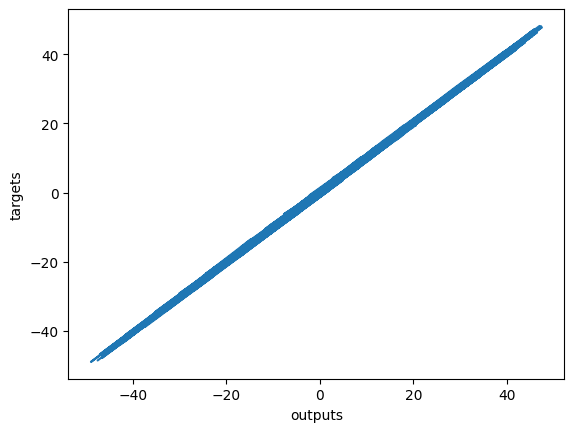

In [25]:
# The model is optimized, so the outputs are calculated based on the last form of the model

# We have to np.squeeze the arrays in order to fit them to what the plot fuction expects.
# Doesn't change anything as we cut dimensios of the size 1 - just a technicality
plt.plot(np.squeeze(model.predict_on_batch(training_data["inputs"])), np.squeeze(training_data["targets"]))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

# Voila - what you see should be exactly the same as in the previous notebook!
# You probably don't see the point of TensorFlow now - it took us the same number of lines of code
# to achieve this simple result. However, once we go deeper in the next chapter,
# TensorFlow will save us hundreds of lines of code.